# Исследование закономерностей успешности продаж игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  
Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Также нужно отработать принцип работы с данными, чтобы можно было прогнозировать продажи на будущее

In [746]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Шаг 1. Общая информация файла с данными

Описание данных
-	Name — название игры
-	Platform — платформа
-	Year_of_Release — год выпуска
-	Genre — жанр игры
-	NA_sales — продажи в Северной Америке (миллионы проданных копий)
-	EU_sales — продажи в Европе (миллионы проданных копий)
-	JP_sales — продажи в Японии (миллионы проданных копий)
-	Other_sales — продажи в других странах (миллионы проданных копий)
-	Critic_Score — оценка критиков (максимум 100)
-	User_Score — оценка пользователей (максимум 10)
-	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).  
Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.


In [747]:
df = pd.read_csv('D:/Yandex.Practicum/projects/games.csv')
print(df.head(10))
df.info()

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

Датафрейм достаточно полный, за исключением столбцов: Critic_Score, User_Score, Rating. В этих столбцак присутствует значительное число пропусков.  
-	Critic_Score — оценка критиков (максимум 100)
-	User_Score — оценка пользователей (максимум 10)
-	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).  

Так как эти столбцы содержат оценки и рейтинги, то возможно, данных изначально не было в первоисточнике.  
В остальных столбцах число пропусков незначительное.  
Содержание столбцов совпадает с их типом данных, за исключением столбца *'User_Score'*. Это необходимо учесть при построении графиков и гистограммм. 


In [748]:
df['User_Score'].unique()#проверим уникальные значения

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Столбец 'User_Score' помимо пропусков и оценок имеет аббревиатуру 'tbd'. Эта аббревиатура значит to be determined = будет определено, поэтому в данном случае можно заменить на *'nan'*

In [749]:
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)# меняем значения tbd на nan
df = df.astype({'User_Score': 'float64'})# меняем тип данных на float64

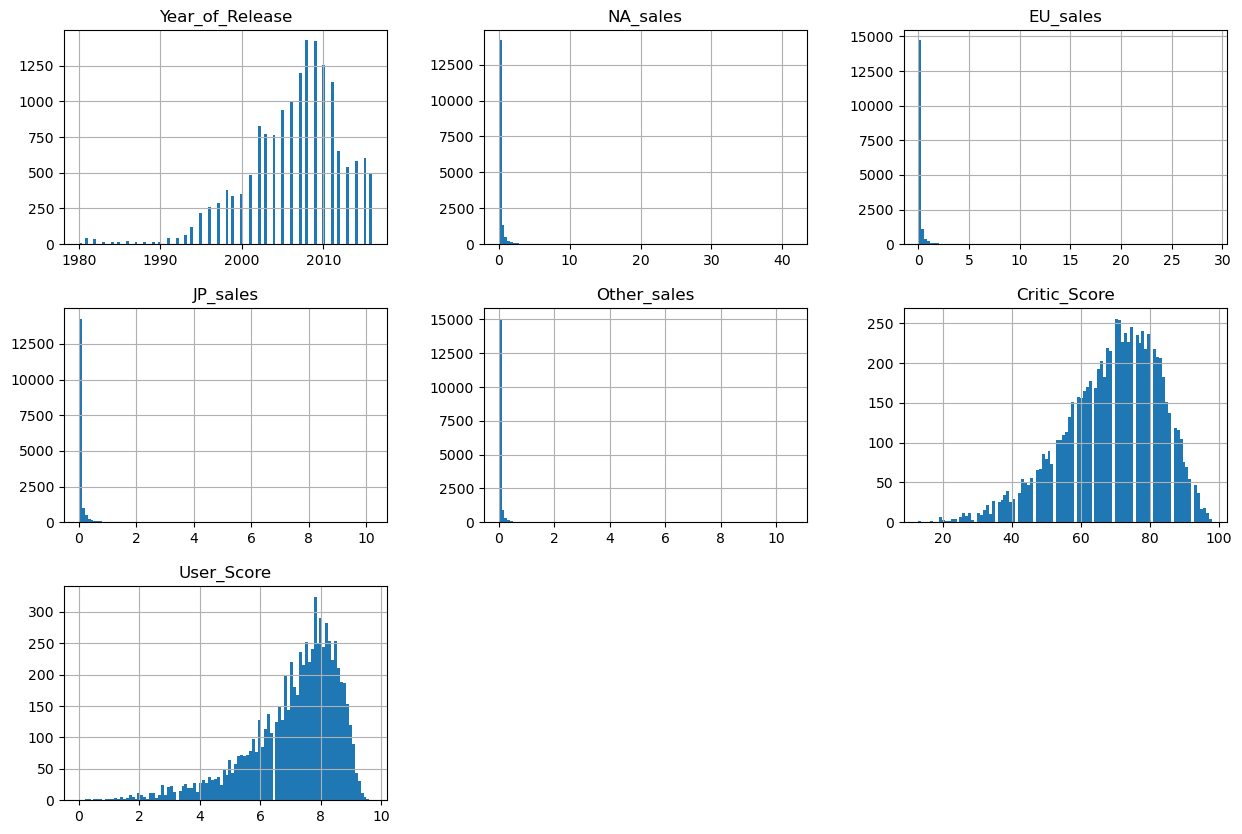

array([[<AxesSubplot:title={'center':'NA_sales'}>,
        <AxesSubplot:title={'center':'EU_sales'}>],
       [<AxesSubplot:title={'center':'JP_sales'}>,
        <AxesSubplot:title={'center':'Other_sales'}>]], dtype=object)

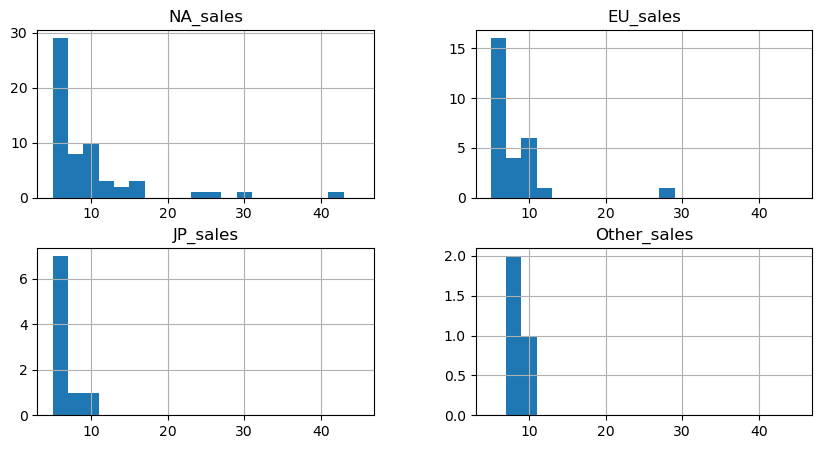

In [750]:
df.select_dtypes(include=np.number).hist(bins=100, figsize=(15,10))# гистограмма для всех числовых столбцов
plt.show()
df[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].hist(bins=20, range=(5, 45), figsize=(10,5))

С 1993 года по 2009 года наблюдается рост числа релизов игр. Далее идет резкий спад с дальнейшей стагнацией после 2009 года.  
Продажи в Северной Америке, Европе и Японии примерно одинаковые. В основном игры имеют охват до 1 млн продаж, однако в Северной Америке есть несколько игр с охватом от 5 до 45 млн копий.  
В Европе нет игр с охватом больше 30 млн.  
В Японии популярные игры расходятся с меньшим размахом. Самые удачные не превышают охват в 10 млн копий.  
В других странах встречаются лишь единицы популярных игр и так же не превышают 10 млн продаж.  
Большинство критиков оценивает игры от 60 до 85 баллов.  
Пользователи оценивают игры в основном от 6.5 до 8.7 баллов.   


<AxesSubplot:ylabel='Platform'>

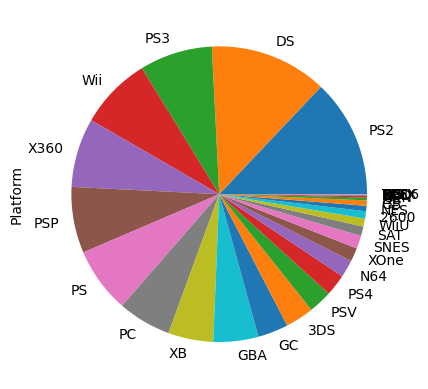

In [751]:
df['Platform'].value_counts().plot(kind='pie')# строим круговую диаграмму приставок 

Самыми популярными приставками являются PS2, DS и PS3

<AxesSubplot:ylabel='Genre'>

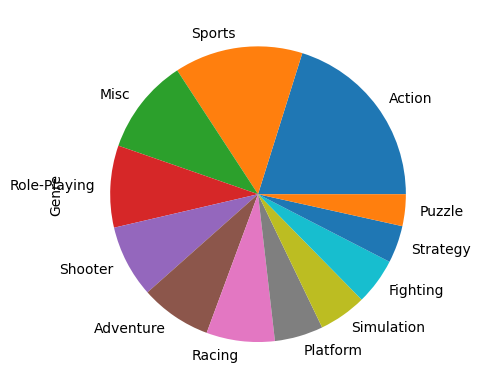

In [752]:
df['Genre'].value_counts().plot(kind='pie')# строим круговую диаграмму жанров игр

Больше всего игр в жанре action и sports 

<AxesSubplot:>

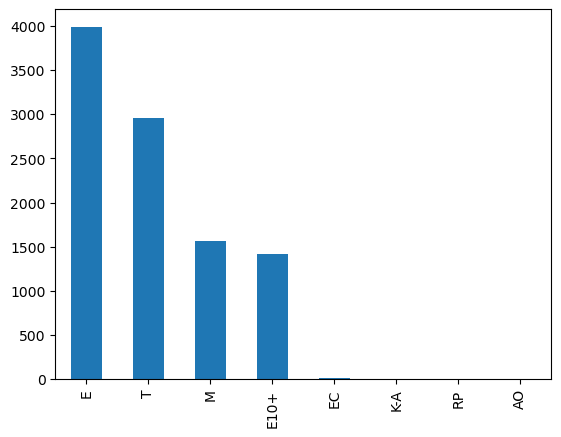

In [753]:
df['Rating'].value_counts().plot(kind='bar')# строим столбчатую диаграмму жанров игр

На графике показаны доли игр по рейтингам.  
Самый популярный рейтинг Е - для всех возрастов  
Затем идет рейтинг Т - от 13 лет, далее М - старше 17 лет и рейтинг Е10+ - от 10 лет и старше.  
Другие рейтинги менее популярны

### Шаг 2. Подготовка данных

#### Приведение названий столбцов к нижнему регистру

In [754]:
df.columns = df.columns.str.lower()#приводим нахвания всех столбцов к нижнему регистру
df.head()# проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [755]:
print(df.head())
df.dtypes#посмотрим, какие типы данных в таблице

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00           NaN         NaN    NaN  


name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Столбец *'year_of_release'* содержит год выпуска, поменяем тип данных на datetime64

In [756]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year#мен\ем тип данных и оставляем только год

Столбец *'critic_score'* содержит оценку критиков и имеет тип float64, хотя оценки целочисленные, поменяем тип данных на int64

In [757]:
df = df.astype({'critic_score': 'Int64'})#меняем тип данных

#### •	Обработайте пропуски при необходимости: 
* Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишите причины, которые могли привести к пропускам;
* Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [758]:
df.isna().sum()#сумма пропущенных значений в каждом столбце

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [759]:
df.loc[df['name'].isna()]['genre'].isna().sum()#проверим, совпадают ли пропуски в столбцах 'name' и 'genre'

2

Удалим строки с совпадающими пропусками в столбцах *'name'* и *'genre'*, так как их очень мало

In [760]:
df = df.dropna(subset=['name', 'genre'])#удаляем строки с пропусками

Проверим пропуски в столбце *'year_of_release'*, так как их не малое количество

После изучения было выявлино лишь, то, что эти игры плохо продавались в Европе, Японии и остальных странах (большинство не продали ни одной копии), однако это ни о чем не говорит, так как подобных неудачных проектов очень много во всем датафрейме  
На техническую ошибку это не похоже, поэтому скорее всего даннных не было изначально и если бы было известно, что данные берутся неопсредственно с платформы "Стримчик", то можно было бы составить запрос для разработчиков.  
В рамках нашего проекта удалим строки c пропусками в столбце *'year_of_release'*.

In [761]:
df = df.dropna(subset=['year_of_release'])#удаляем строки с пропусками
df['year_of_release'].isna().sum()

0

Проверим пропуски в столбцах *'critic_score'*, *'user_score'*, *'rating'*  
В этих столбцах содержится много пропусков, от 35 до 65%  
Проверим, совпадают ли пропуски во всех трех столбцах

In [762]:
df.loc[(df['critic_score'].isna()) & (df['user_score'].isna()) & (df['rating'].isna())]['name'].count()
#число строк с совпадающимим пропусками в столбцах с оценками и рейтингом

6580

Большинство пропусков совпало, практически полностью перекрыв пропуски в столбце с рейтингом, однако столбцы с оценками в среднем имеют еще около 2000 пропусков, которые никак не связаны с рейтингом.  
Возможно они связаны между собой, проверим

In [763]:
df.loc[(df['critic_score'].isna()) & (df['user_score'].isna())]['name'].count()

7892

Общих пропусокв в столбцах с оценками критиков и юзеров больше, но все равно остается большая часть никак не связанных пропусков.

Необходимо уточнить у разработчиков, откуда берутся данные для этих трех столбцов.  
Если данные берутся непосредственно с игровой платформы, а не из сторонних источников, то стоит сделать запрос на  проверку данных категорий.  
Удалить пропуски нельзя, так как их слишком много. Заменить их тоже не получится, так как нет общих факторов. Среднее или медиана тоже не подойдут, так как это сильно повлияет на дальнейший анализ.  
Возможно, некоторые игры отсутствуют в изначальном источнике данных с этими показателями

#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [764]:
df['all_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)# создадим столбец и добавим в него сумму продаж по всему миру
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


### Шаг 3. Исследовательский анализ данных

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64


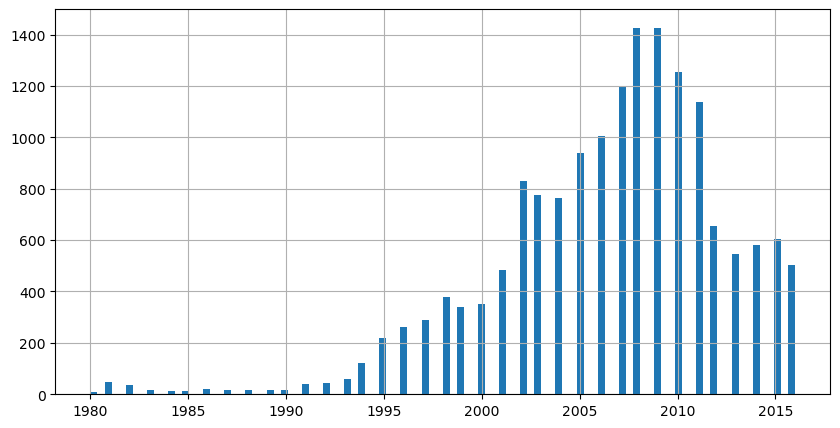

In [765]:
print(df['year_of_release'].value_counts())
df['year_of_release'].hist(bins=100, figsize=(10, 5))
plt.show()

Аномальных значений в столбце *'year_of_release'* нет. Количество игр по годам соответствует развитию игровой индустрии и развитию технологий.  
От года к году количество выпускаемых игр постепенно растет  
Возможно, для каких-то исследований потребуется создать отдельные группы с 1980 до 2000, с 2000 до 2010 и с 2010 по 2016, так как на гистограмме прослеживаеются этапы развития индустрии. Сначала зарождение индустрии и определение основных принципов разработки и продвижения игр, затем бум игровой индустрии и дальнейший спад всвязи с изменением подхода к созданию игр и поиском новых необычных решений при создании игр.
При необходимости можно добавить столбец с 3-мя временными группами  
Пока оставляем данные без изменений

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [766]:
df.pivot_table(values='all_sales', index='platform', aggfunc='sum')# создадим сводную таблицу суммарных продаж по платформам

,all_sales
platform,
2600,86.48
3DO,0.10
3DS,257.81
DC,15.95
DS,802.78
GB,254.43
GBA,312.88
GC,196.73
GEN,28.35


In [767]:
count_sales = {}# создадим пустой словарь
for i in df['platform'].unique():# ключ - уникальные значения в столбце с названиями пунктов, а сами значения - количество строк
    count_sales[i] = df[df['platform']==i]['all_sales'].sum()
count_sales_sorted = sorted(count_sales.items(), key=lambda x:x[1], reverse=True)# сортируем от максимума к минимуму
count_sales_sorted[:10]# оставляем первые 10 значений


[('PS2', 1233.56),
 ('X360', 961.2400000000001),
 ('PS3', 931.34),
 ('Wii', 891.18),
 ('DS', 802.78),
 ('PS', 727.58),
 ('PS4', 314.14),
 ('GBA', 312.87999999999994),
 ('PSP', 289.53000000000003),
 ('3DS', 257.81)]

<AxesSubplot:xlabel='year_of_release'>

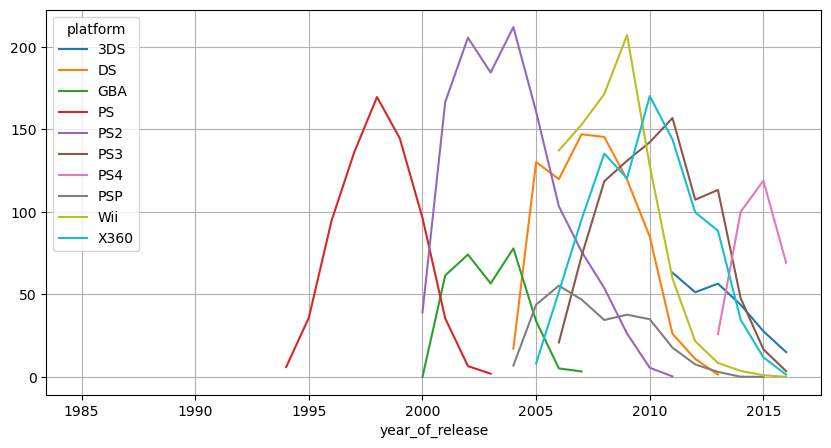

In [768]:
top_sales = []
for i in count_sales_sorted[:10]:
    top_sales.append(i[0])# создаем список из топ-городов
top_sales

df.query('platform in @top_sales')\
    .pivot_table(values = 'all_sales', columns='platform',index='year_of_release', aggfunc='sum')\
    .plot(figsize=(10,5),  grid=True)

Создадим и заполним таблицу по полученным графикам, где будет оттображено по возрастанию года выпуска платформы:  
имя платформы;  
категория продаж (до 100 млн копий в пике, от 100 млн в пике);  
год выхода платформы;  
продолжительность пика продаж от 50 млн и выше и от 100 млн и выше, соответственно, по категориям продаж (запись промежутка от года к году);  
год исчезновения платформы;  
весь период присутствия на рынке;  
продолжительность пика продаж

| platform | category_sales | start_year | peak_duration_from_year_to_year | finish_year | all_duration | peak_duration |
|----------|----------------|------------|---------------------------------|-------------|--------------|---------------|
| PS2      | from 100       | 2000       | 2002-2004                       | 2010-2011   | 11           | 5             |
| GBA      | up to 100      | 2000       | 2002-2004                       | 2007        | 7            | 3             |
| DS       | from 100       | 2004       | 2005-2008                       | 2013        | 9            | 5             |
| PSP      | up to 100      | 2004       | 2006                            | 2014        | 10           | 1             |
| X360     | from 100       | 2005       | 2007-2012                       | 2016        | 11           | 5             |
| Wii      | from 100       | 2006       | 2008                            | 2016        | 10           | 5             |
| PS3      | from 100       | 2006       | 2008-2012                       | 2016        | 10           | 5             |
| 3DS      | up to 100      | 2011       | 2011-2013                       | 2016-->     | 5-->         | 2             |
| PS4      | from 100       | 2013       | 2014-2016                       | 2016-->     | 3-->         | 2             |


Из таблицы хорошо видно, что в среднем пик продаж платформ от 100 млн копий и выше составляет 5 лет.  
Менее популярные платформы находятся в тренде в среднем около 2-х лет.  
Новые платформы появляются на рынке хаотичным образом, согласно развитию технологий, однако есть определенные промежутки времени, в которые выходит сразу несколько конкурирующих платформ. Обычно выходит одновременно 2-3 платформы раз в 4 года в промежутке с 1994 по 2005 и далее срок выхода платформ уменьшается до 2-х лет.  
Исчезновение игр с рынка в основном связано с выходом новых платформ, т.е. старая платформа набирает пик, выходит новая платформа, пик спадает, старая платформа постепенно уходит с рынка.  
В среднем платформа присутствует на рынке 10 лет. 

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Целесообразно будет использовать данные после 2013 года. В этом году вышла платформ а PS4, именно она теперь будет задавать тренд на последующие годы.  
Также после 2013 года объемы продаж сокращаются. Таких продолжительных пиков, как до 2013 уже не наблюдается.

In [769]:
df_actual = df[df['year_of_release'] >= 2013]#срез данных с 2013 года включительно
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. (не учитывать данные за предыдущие годы)

<AxesSubplot:xlabel='year_of_release'>

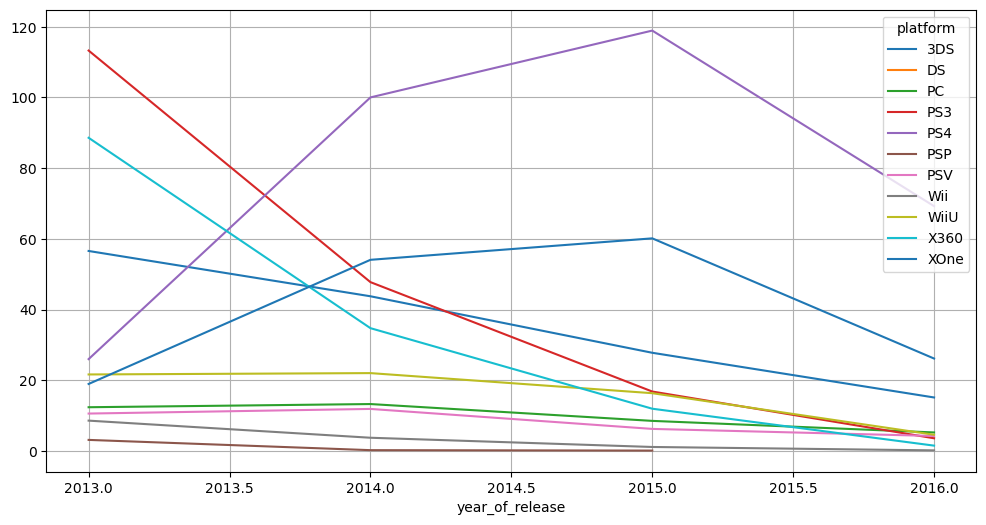

In [770]:
df_actual\
    .pivot_table(values = 'all_sales', columns='platform',index='year_of_release', aggfunc='sum')\
    .plot(figsize=(12,6),  grid=True)

In [771]:
df_actual\
    .pivot_table(values = 'all_sales', columns='platform',index='year_of_release', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Продажи всех платформ за последние годы падают. Стремительнее всех теряют PS4 и XOne, однако эти платформы одновременно в топе и имеют хорошие показатели продаж, учитывая среднюю продолжительность жизни платформы в 10 лет. Платформа 3DS на рынке примерно то же время, что и PS4 и XOne, однако ее пик продаж пришелся на начало выхода платформы на рынок. Остальные платформы доживают свои дни на рынке и имеют слабые продажи. Платформы DS и PSP не имеют данных за последние 3 и 1 год, соответственно, однако учитывая известные последние данные о продажах, количеством продаж данных платформ за пропущенные годы можно пренебречь.  
Платформа РС отличается от других платформ и имеет другую, более длинную продолжительность жизни и поэтому не может сравниваться с ними. Эта платформа живет и будет жить долго и при этом имеет низкое количество продаж.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

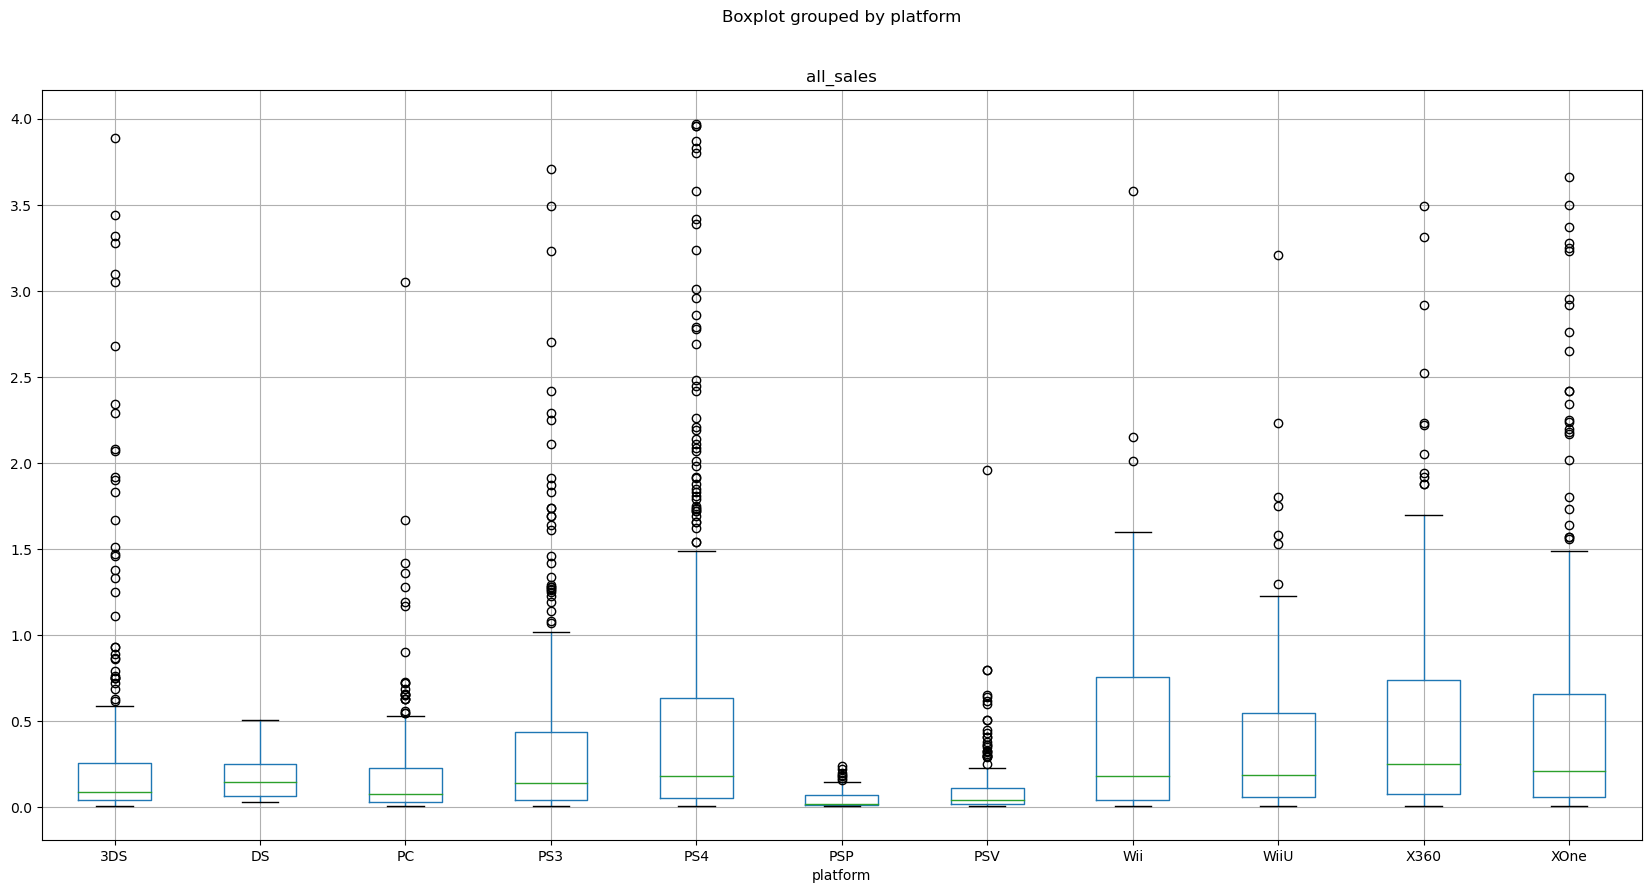

In [772]:
df_actual[df_actual['all_sales'] < 4].boxplot(column = 'all_sales', by= 'platform', figsize=(20, 10))#ограничим значения продаж игр до 4 млн копий

Из диаграммы видно, что в среднем наилучшие показатели продаж имеют платформы: PS3, PS4,, Wii, WiiU, X360 и XOne. Также неплохие показатели имеет платформа 3DS за счет большого количества выбросов.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. •	Critic_Score 

Для анализа возьмем самую актуальную и популярную платформу PS4

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

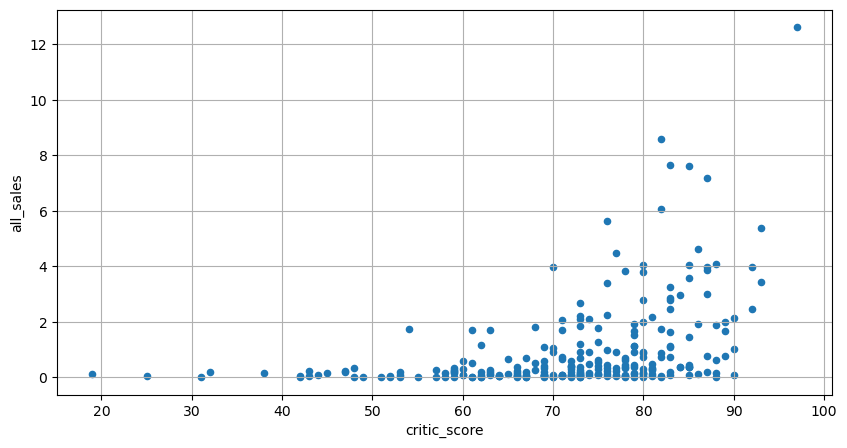

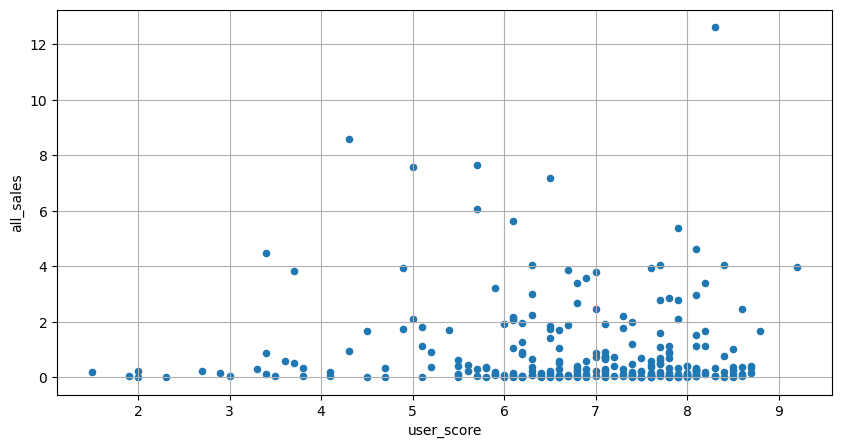

In [773]:
df_actual[df_actual['platform'] == "PS4"].plot(x='critic_score' , y='all_sales', kind='scatter', grid=True, figsize=(10, 5))
df_actual[df_actual['platform'] == "PS4"].plot(x='user_score' , y='all_sales', kind='scatter', grid=True, figsize=(10, 5))

In [774]:
print(df_actual[df_actual['platform'] == "PS4"].loc[:, ['critic_score','all_sales']].corr())
df_actual[df_actual['platform'] == "PS4"].loc[:, ['user_score','all_sales']].corr()

              critic_score  all_sales
critic_score      1.000000   0.406568
all_sales         0.406568   1.000000


,user_score,all_sales
user_score,1.000000,-0.031957
all_sales,-0.031957,1.000000


Корреляция между столбцами critic_score и all_sales равна 0.4, что является слабой зависимостью. Это видно и на диаграмме рассеяния.  
Есть определенное количество игр, которые получили высокую оценку критиков и при этом имеют хорошие продажи, однако есть достаточно игр с высокой оценкой критиков, но при этом продажи низкие. Однако есть определеннаяя тенденция на большое количество продаж, если оценка критиков выше 70.  
Что касается оценки пользователей, то ситуация немного другая. Корреляция примерно равна нулю, а значит оценка пользователей в целом никак не влияет на количество продаж, но в целом оценки пользователей ниже оценок критиков, если их приравнять.  
Однозначный вывод сделать сложно, однако есть определенное количество игр, которые имеют хорошие продажи и высокие оценки критиков, но низкую оценку пользователей. Это говорит о том, что некоторые игры на деле не соответствуют ожиданиям, но благодаря высокой оценке критиков имеют хорошие продажи.

#### Соотнесите выводы с продажами игр на других платформах.

Для наглядности возьмем разные типы платформ по давности популярности, количеству продаж и типу.  
Возьмем платформу РС, как платформу другого типа. ХОne, как одну из самых продаваемых после PS4. 3DS, так как у этой платформы пик продаж пришелся на начало выхода платформы на рынок и при этом эта платформа самая живая их всех старичков и не входит в семейство PS и Microsoft.

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

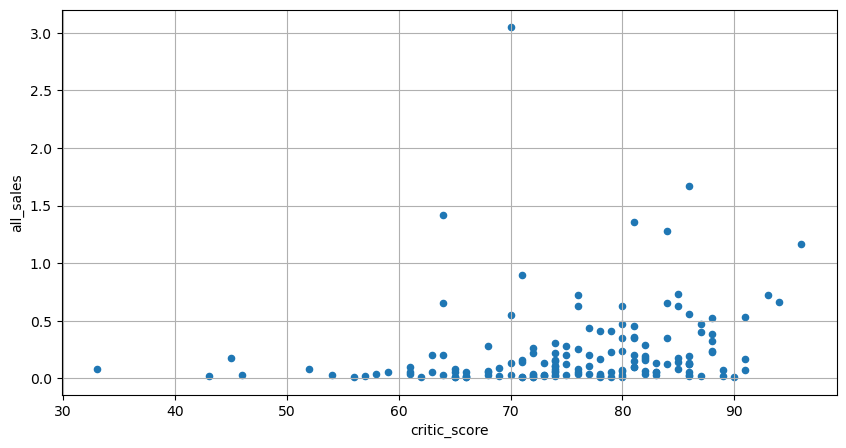

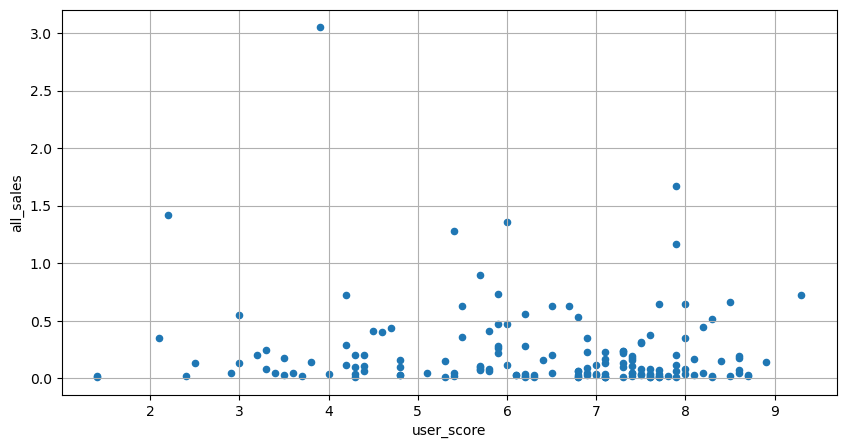

In [775]:
df_actual[df_actual['platform'] == "PC"].plot(x='critic_score' , y='all_sales', kind='scatter', grid=True, figsize=(10, 5))
df_actual[df_actual['platform'] == "PC"].plot(x='user_score' , y='all_sales', kind='scatter', grid=True, figsize=(10, 5))

In [776]:
print(df_actual[df_actual['platform'] == "PC"].loc[:, ['critic_score','all_sales']].corr())
df_actual[df_actual['platform'] == "PC"].loc[:, ['user_score','all_sales']].corr()

              critic_score  all_sales
critic_score       1.00000    0.19603
all_sales          0.19603    1.00000


,user_score,all_sales
user_score,1.000000,-0.093842
all_sales,-0.093842,1.000000


Корреляция между оценкой критиков и общими продажами так же практически отсутствует. Вероятно это связано с отсутствием эксклюзивных игр, которые выходят на других платформах.  
В общем прослеживается ситуация аналогичная с платформой PS4

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

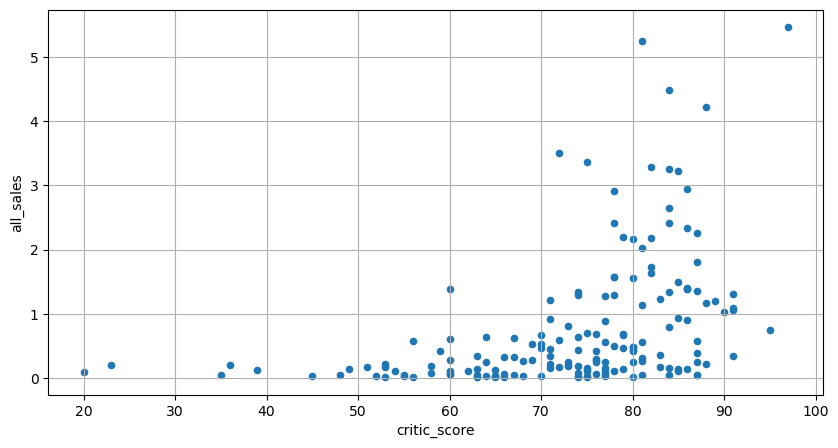

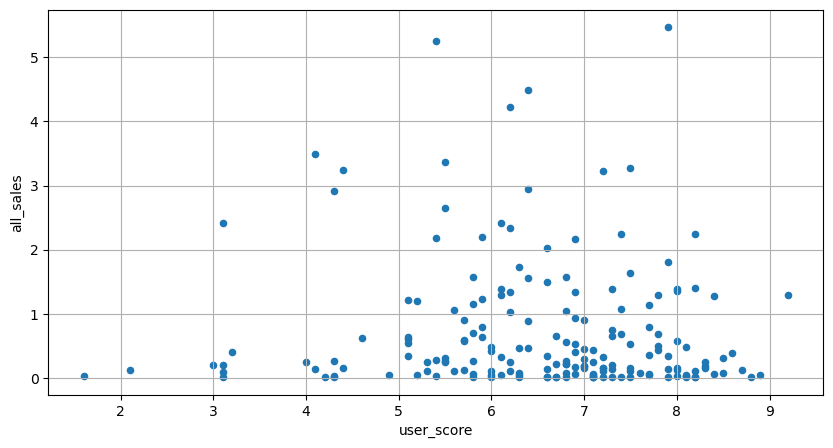

In [777]:
df_actual[df_actual['platform'] == "XOne"].plot(x='critic_score' , y='all_sales', kind='scatter', grid=True, figsize=(10, 5))
df_actual[df_actual['platform'] == "XOne"].plot(x='user_score' , y='all_sales', kind='scatter', grid=True, figsize=(10, 5))

In [778]:
print(df_actual[df_actual['platform'] == "XOne"].loc[:, ['critic_score','all_sales']].corr())
df_actual[df_actual['platform'] == "XOne"].loc[:, ['user_score','all_sales']].corr()

              critic_score  all_sales
critic_score      1.000000   0.416998
all_sales         0.416998   1.000000


,user_score,all_sales
user_score,1.000000,-0.068925
all_sales,-0.068925,1.000000


XOne имеет аналогичеую картину как и платформа PS4

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

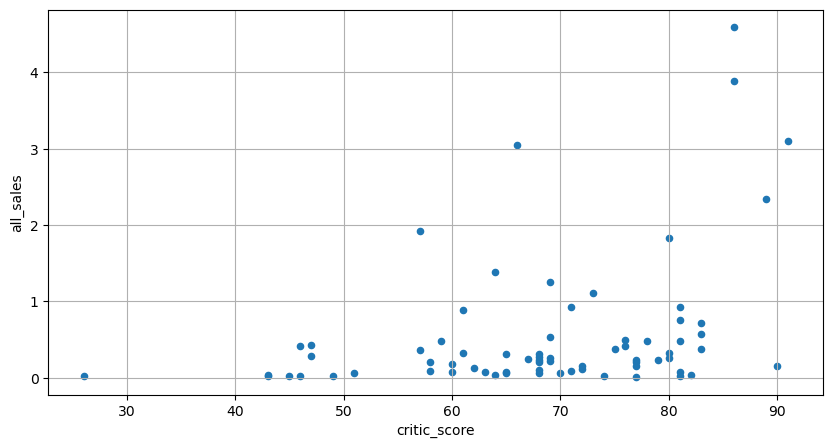

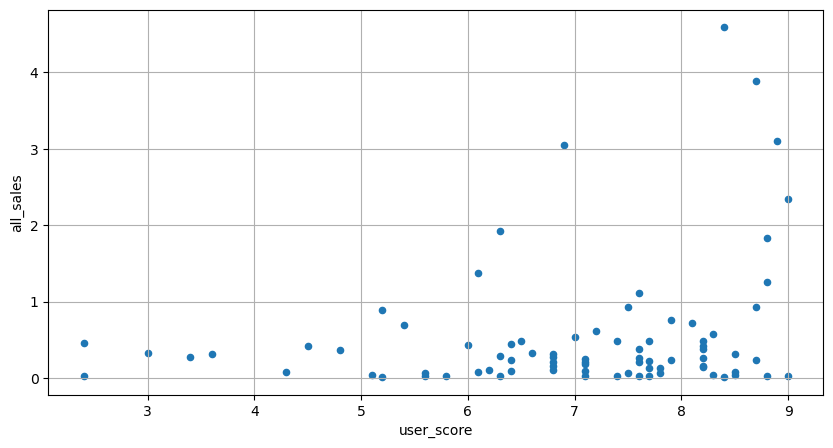

In [779]:
df_actual[df_actual['platform'] == "3DS"].plot(x='critic_score' , y='all_sales', kind='scatter', grid=True, figsize=(10, 5))
df_actual[df_actual['platform'] == "3DS"].plot(x='user_score' , y='all_sales', kind='scatter', grid=True, figsize=(10, 5))

In [780]:
print(df_actual[df_actual['platform'] == "3DS"].loc[:, ['critic_score','all_sales']].corr())
df_actual[df_actual['platform'] == "3DS"].loc[:, ['user_score','all_sales']].corr()

              critic_score  all_sales
critic_score      1.000000   0.357057
all_sales         0.357057   1.000000


,user_score,all_sales
user_score,1.000000,0.241504
all_sales,0.241504,1.000000


3DS имеет аналогичеую картину как и платформа PS4

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [781]:
df_actual.pivot_table(values='all_sales', index='genre', aggfunc=['mean', 'median', 'sum', 'count'])

,mean,median,sum,count
,all_sales,all_sales,all_sales,all_sales
genre,,,,
Action,0.420196,0.110,321.87,766
Adventure,0.096490,0.030,23.64,245
Fighting,0.441375,0.125,35.31,80
Misc,0.405290,0.100,62.82,155
Platform,0.576081,0.225,42.63,74
Puzzle,0.186471,0.060,3.17,17
Racing,0.469294,0.120,39.89,85
Role-Playing,0.499623,0.125,145.89,292


Самыми многочисленным жанром является Action, целых 766 игр. Этот жанр так же и самый продаваемый ~ 322 млн копий.  
Игр в жанрах Role-Playing, Adventure, Sports и Shooter тоже большое количество, однако это не влияет на суммарную продажу копий. Жанр Shooter имеет всего 187 игр, но при этом хорошие продажи - 233 млн копий. Третий по количеству игр жанр Adventure - имеет лишь около 24 млн копий, что является одним из худших показателей среди всех жанров.  
Самым малочисленным является жанр Puzzle с примерно 3 млн копий.  
Для более качественного исследования жанров построим диаграмму количества игр и суммарных продаж, а также гистограмму каждого жанра по кол-ву продаж.  

<AxesSubplot:xlabel='genre'>

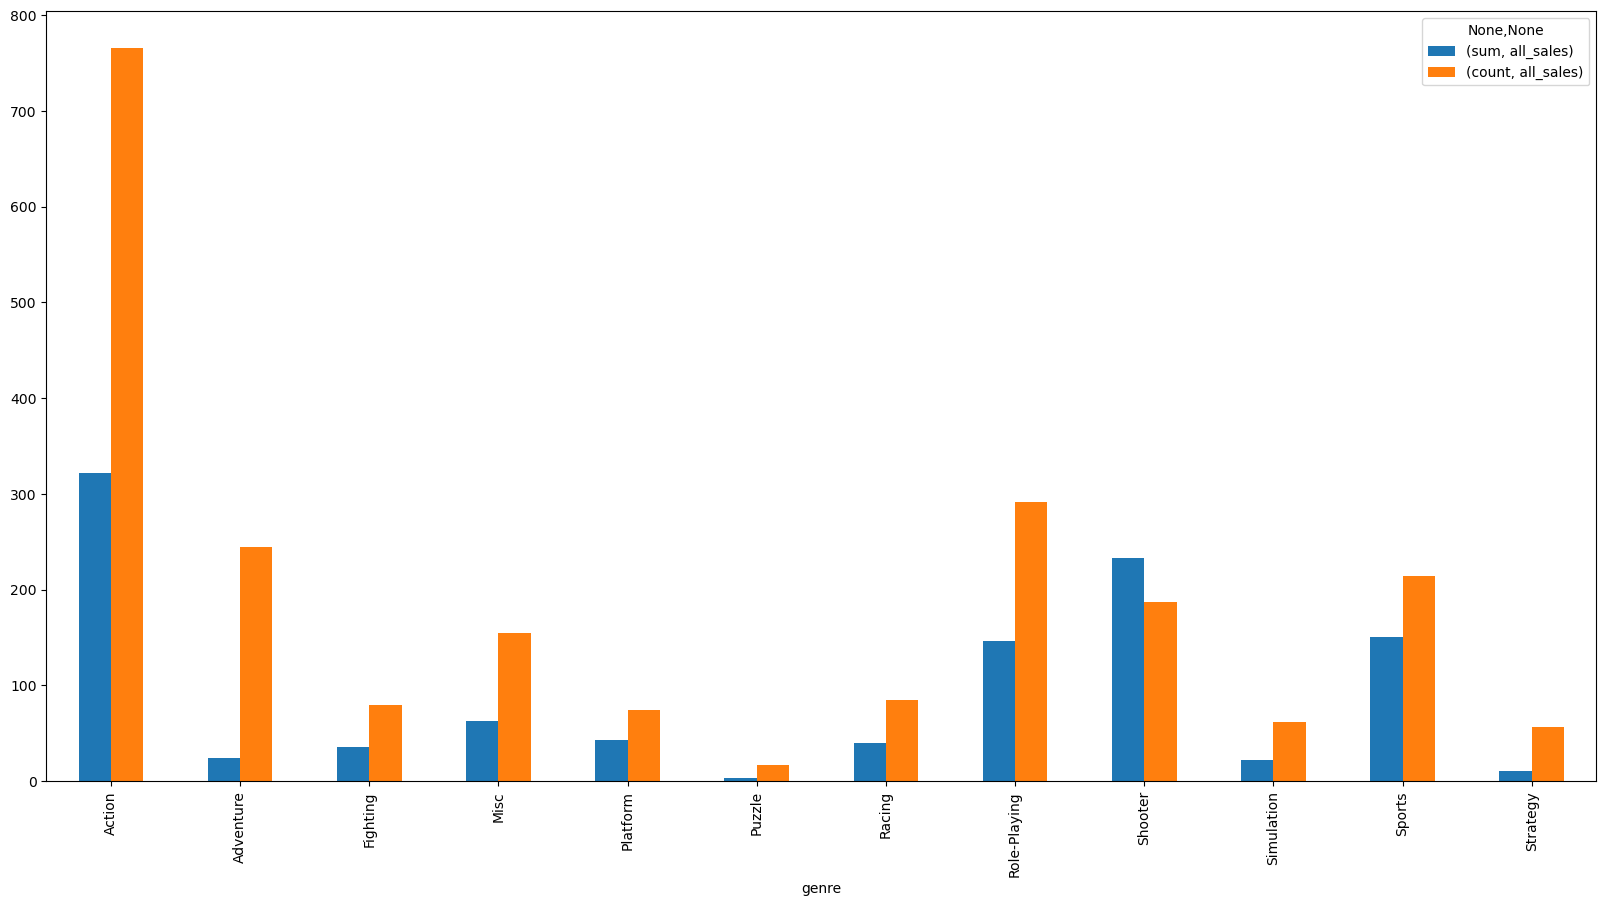

In [782]:
df_actual.pivot_table(values='all_sales', index='genre', aggfunc=['sum', 'count']).plot(kind='bar', figsize=(20, 10))
# построим столбчатую диаграмму суммарных продаж и суммарного количества игр по жанрам

Жанр Action выглядит самым крупным нестабильным жанром, кажется, что он имеет такой успех лишь благодаря небольшой части игр.  
Жанры Fighting, Misc, Racing, Role-Playing, Simulation похожи на Action, но с меньшим кол-вом игр.  
Жанр Shooter выглядит самым эффективным, так как имеет самое большое превышение продаж по отношению к кол-ву игр.  
Далее по эффективности идут жанры  Sports и Platform, соответственно.  
Жанры Simulation, Strategy и Adventure самые плохие по прибыльности жанры.  

In [783]:
print(df_actual[df_actual['genre'] == "Action"].loc[df_actual['all_sales'] < 0.1, 'all_sales'].count())
df_actual[df_actual['genre'] == "Action"].loc[df_actual['all_sales'] < 4, 'all_sales'].sum()

371


242.62000000000003

Посчитаем процент удачных проектов каждого жанра, опираясь на самый высокий мединный показатель продаж жанра Shooter (0.45 млн копий)

In [784]:
print("Соотношение удачных игр ко всему кол-ву игр жанра:\n")
for i in df_actual['genre'].unique():
    print(
        f"{i:<12} {((df_actual[df_actual['genre'] == i].loc[df_actual['all_sales'] > 0.45, 'all_sales'].count() / len(df_actual[df_actual['genre'] == i])) * 100).round(1):<4}%"
        f"{df_actual[df_actual['genre'] == i].loc[df_actual['all_sales'] > 0.45, 'all_sales'].count():>5}" 
        f" из {len(df_actual[df_actual['genre'] == i]):<2}"
        )

Соотношение удачных игр ко всему кол-ву игр жанра:

Action       20.0%  153 из 766
Shooter      49.7%   93 из 187
Role-Playing 21.9%   64 из 292
Misc         18.7%   29 из 155
Sports       36.9%   79 из 214
Fighting     18.8%   15 из 80
Racing       22.4%   19 из 85
Simulation   11.3%    7 из 62
Platform     35.1%   26 из 74
Strategy     7.1 %    4 из 56
Adventure    4.5 %   11 из 245
Puzzle       17.6%    3 из 17


Самыми стабильно прибыльными жанрами после жанра Shooter являются Sports и Platform.  
37% и 35% игр этих жанров являются потенциально успешными.  
Жанры Simulation, Strategy и Adventure самые плохие по прибыльности.  
Остальные жанры имеют в среднем 20% на успех

Для наглядности и подтверждения гипотез изучим гистограммы каждого жанра по продажам.

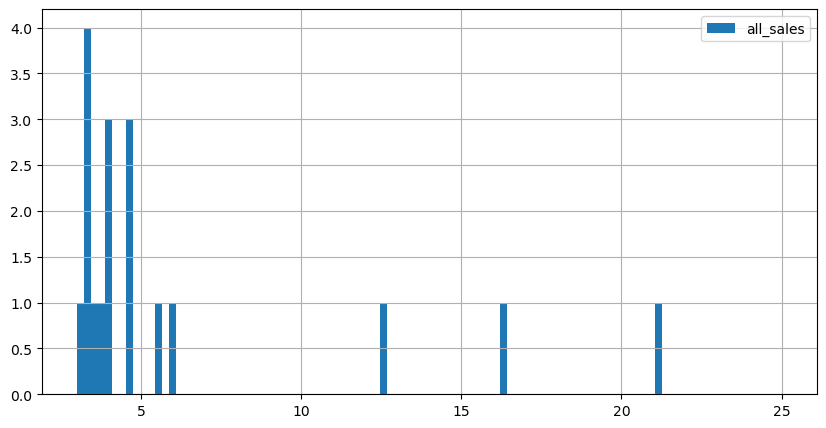

Action_short


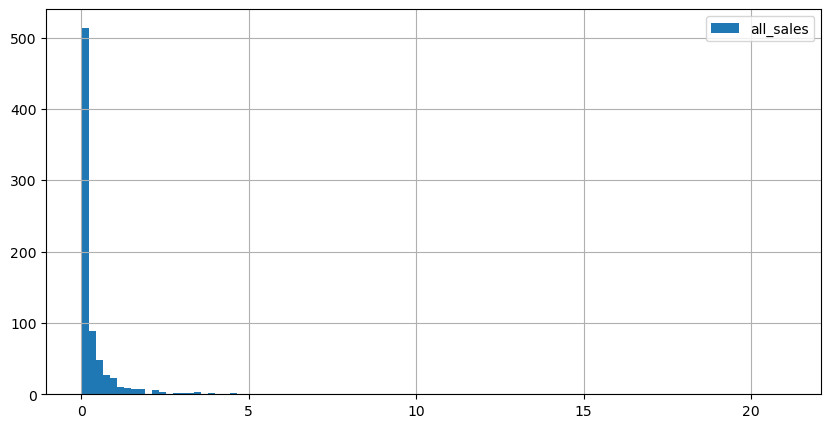

Action


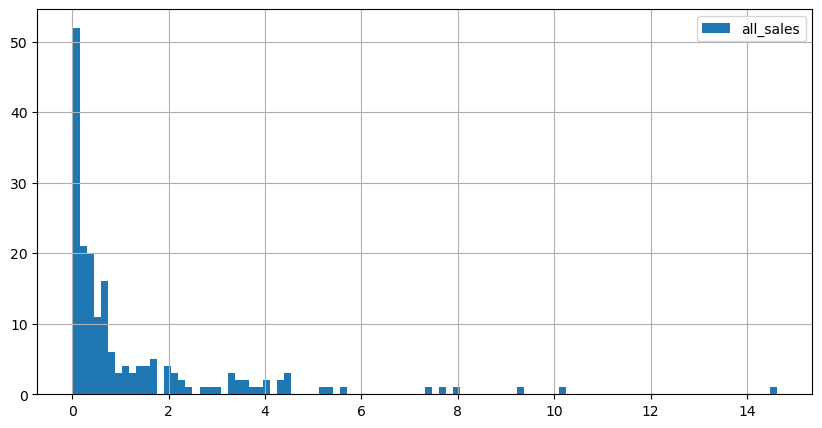

Shooter


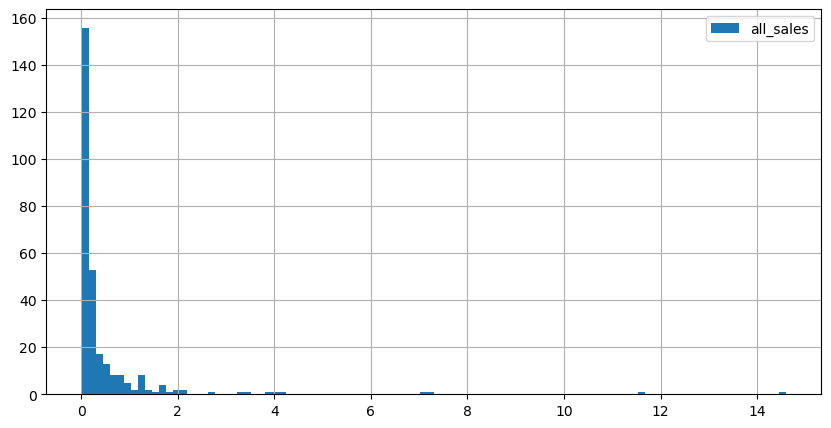

Role-Playing


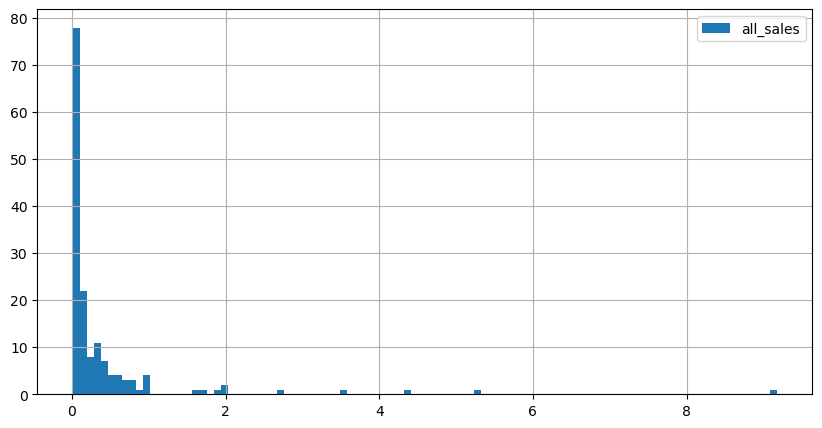

Misc


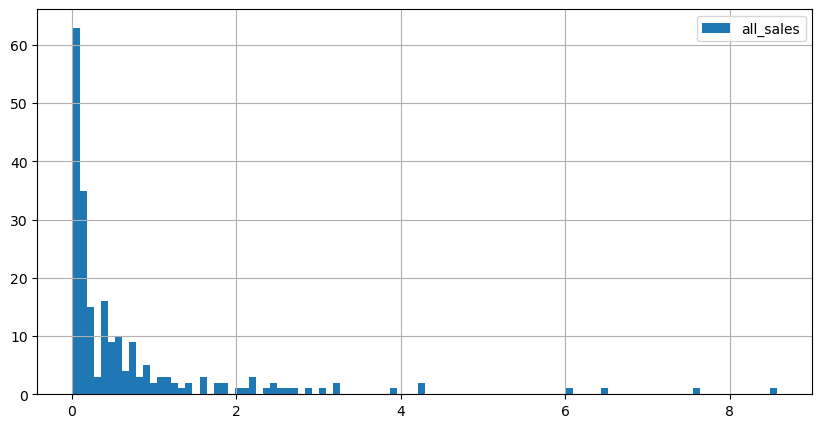

Sports


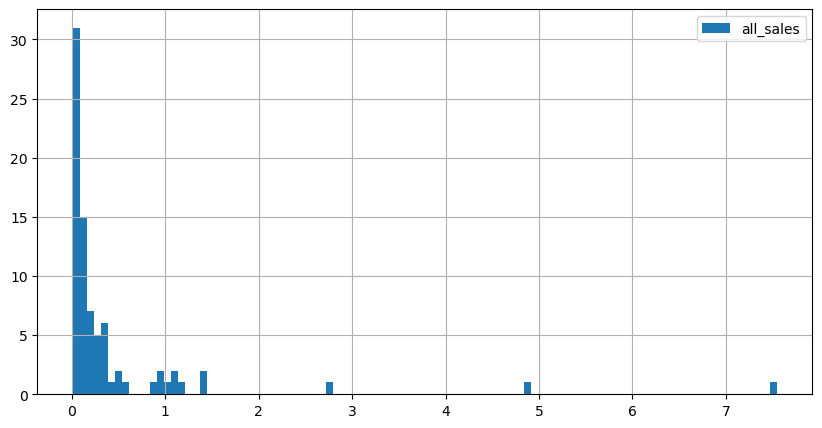

Fighting


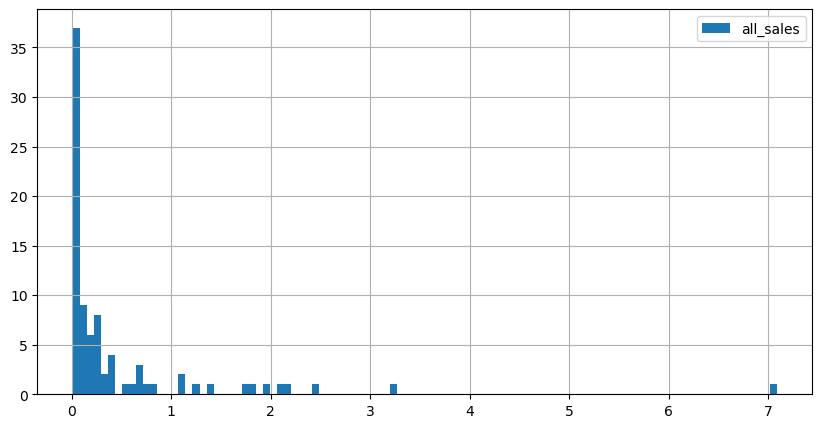

Racing


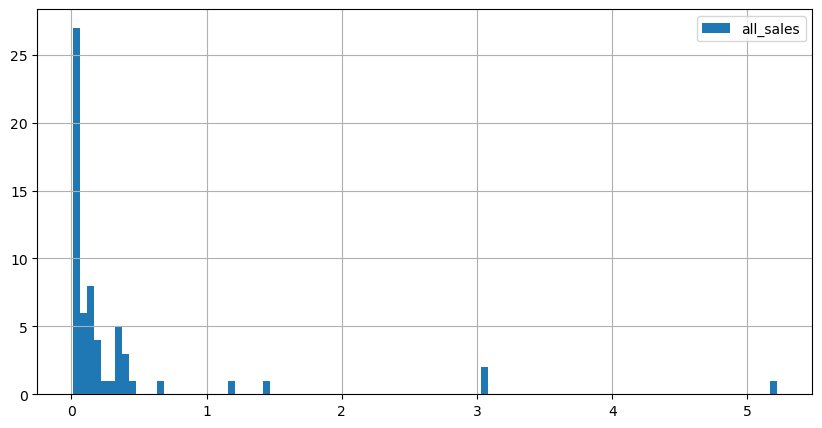

Simulation


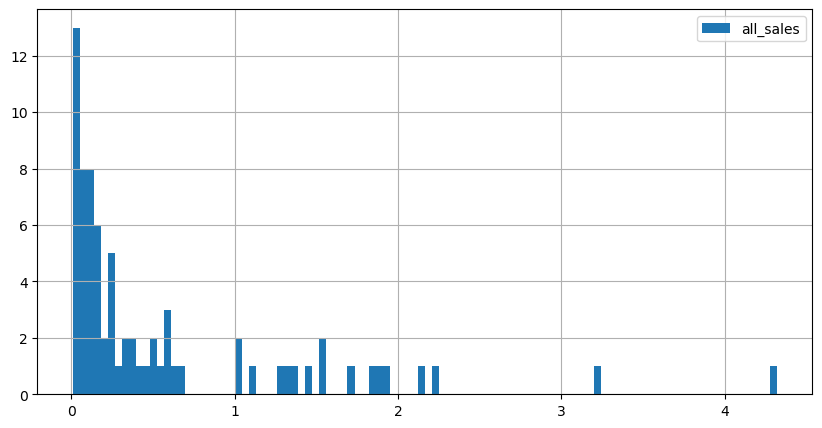

Platform


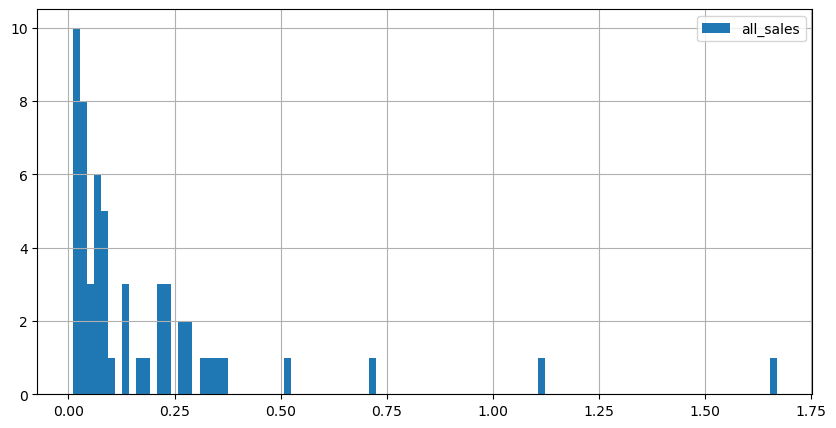

Strategy


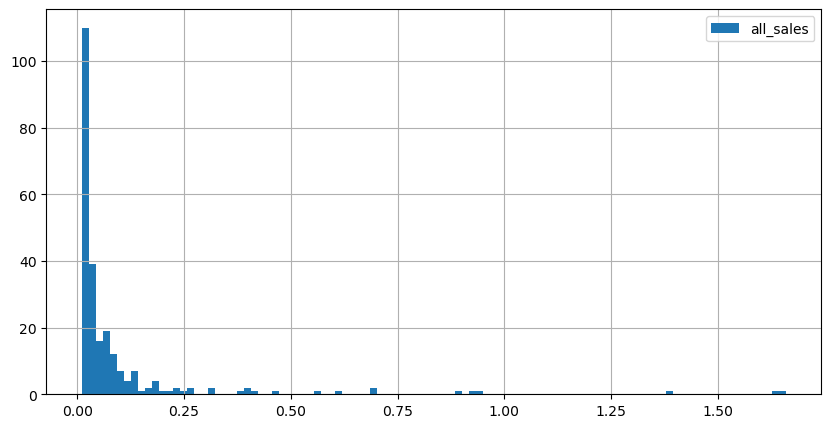

Adventure


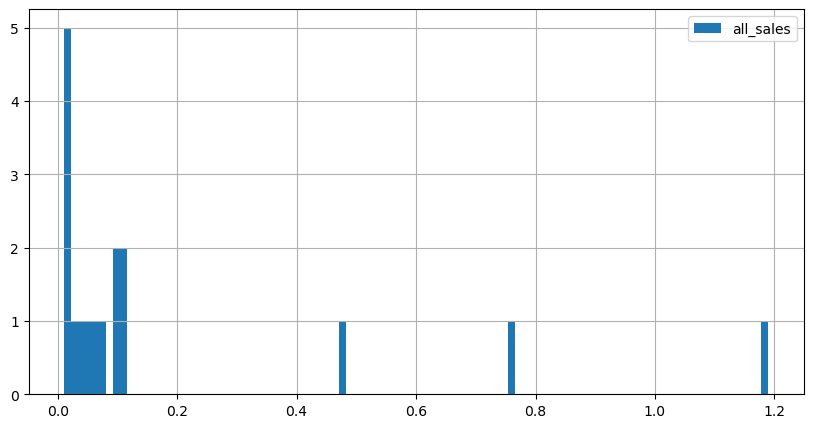

Puzzle


In [785]:
df_actual[df_actual['genre'] == "Action"]['all_sales'].hist(bins=100, figsize=(10,5), legend = True, range=(3, 25))
plt.show()
print('Action_short')
for x in df_actual['genre'].unique():
    df_actual[df_actual['genre'] == x]['all_sales'].hist(bins=100, figsize=(10,5), legend = True)
    plt.show()
    print(x)

На полученных гистограммах хорошо видно, что жанры Shooter, Sports и Platform похоже выделяются наибольшим сходством с нормальным распределением.

### Шаг 4. Портрет пользователя каждого региона

#### Определите для пользователя каждого региона (NA, EU, JP):  
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?


Выведем столбчатую диграмму продаж в каждом регионе по имени платформы

<AxesSubplot:xlabel='platform'>

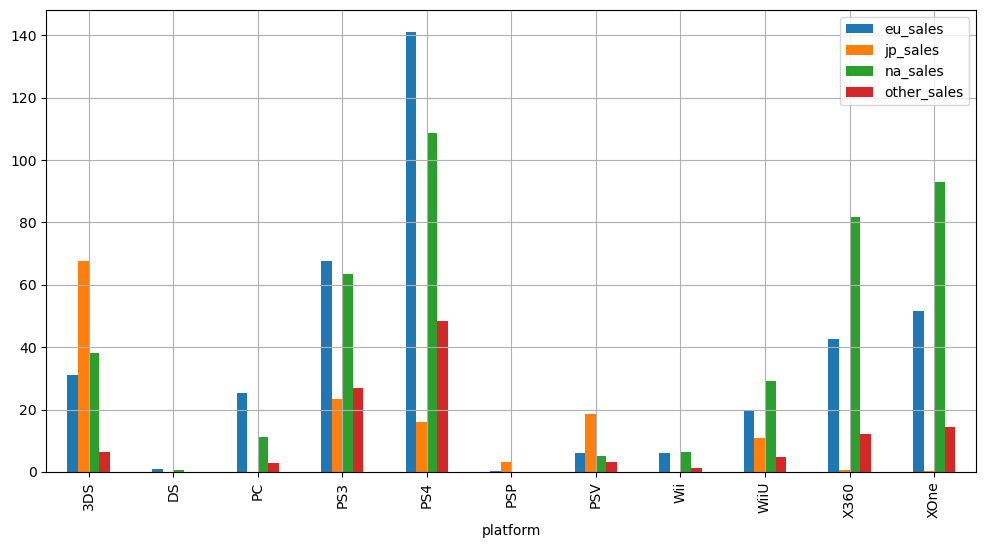

In [786]:
df_actual.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum',)\
    .plot(kind='bar', figsize=(12, 6), grid=True)# 

В Европе платформы PS4, PS3, XOne, X360 и 3DS входят в топ-5 самых популярных  
В Японии: 3DS, PS3, PSV, PS4, WiiU  
В Северной Америке: PS4, XOne, X360, PS3, 3DS  
В остальных странах: PS4, PS3, XOne, X360 и 3DS, аналогично ситуации в Европе  

Относительно ТОПов:  
В общем такие регионы, как Северная Америка и Европа имеют похожие предпочтения, за исключением 3х платформ. В Европе болле популярны продукты Microsoft - XOne, X360. В Северной Америке же больше предпочитают PS, в частности PS3.  
Остальные регионы полностью совпадают с предпочтениями европейцев.  
Япония выделяется на фоне остальных регионов, так как там больше всех в мире предпочитают платформу 3DS. При чем эта платформа фаворит Японии, когда в других регионах она на 5-ом месте. Так же в Японии популярна PSV и WiiU, которые в остальном мире обычно на 6-8 месте.  

Общие замечания по регионам:  
Отличительная от остальных платформа РС больше всего популярна в Европе и Америке. В Японии же на РС практически никто не играет. Так же Японцы практически не покупают DS, Wii, XOne и X360, однако только в Японии играют на PSP.  
Платформа 4 имеет успех по всему миру кроме Японии  
Самые платежеспособные регионы это СА и Европа. Япония занимает примерно такую же долю, как и се остальные страны кроме СА и Европы

In [787]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   float64
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    Int64  
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  all_sales        2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 293.5+ KB


In [788]:
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    print(df_actual.pivot_table(values=i, index='genre', aggfunc=['mean', 'median', 'sum', 'count']))

                  mean   median      sum    count
              na_sales na_sales na_sales na_sales
genre                                            
Action        0.164556    0.020   126.05      766
Adventure     0.029143    0.000     7.14      245
Fighting      0.194375    0.045    15.55       80
Misc          0.177355    0.010    27.49      155
Platform      0.245135    0.090    18.14       74
Puzzle        0.048824    0.000     0.83       17
Racing        0.152471    0.030    12.96       85
Role-Playing  0.158904    0.020    46.40      292
Shooter       0.586845    0.200   109.74      187
Simulation    0.078387    0.000     4.86       62
Sports        0.305000    0.080    65.27      214
Strategy      0.058571    0.000     3.28       56
                  mean   median      sum    count
              eu_sales eu_sales eu_sales eu_sales
genre                                            
Action        0.154217    0.020   118.13      766
Adventure     0.033673    0.000     8.25      245


<AxesSubplot:xlabel='genre'>

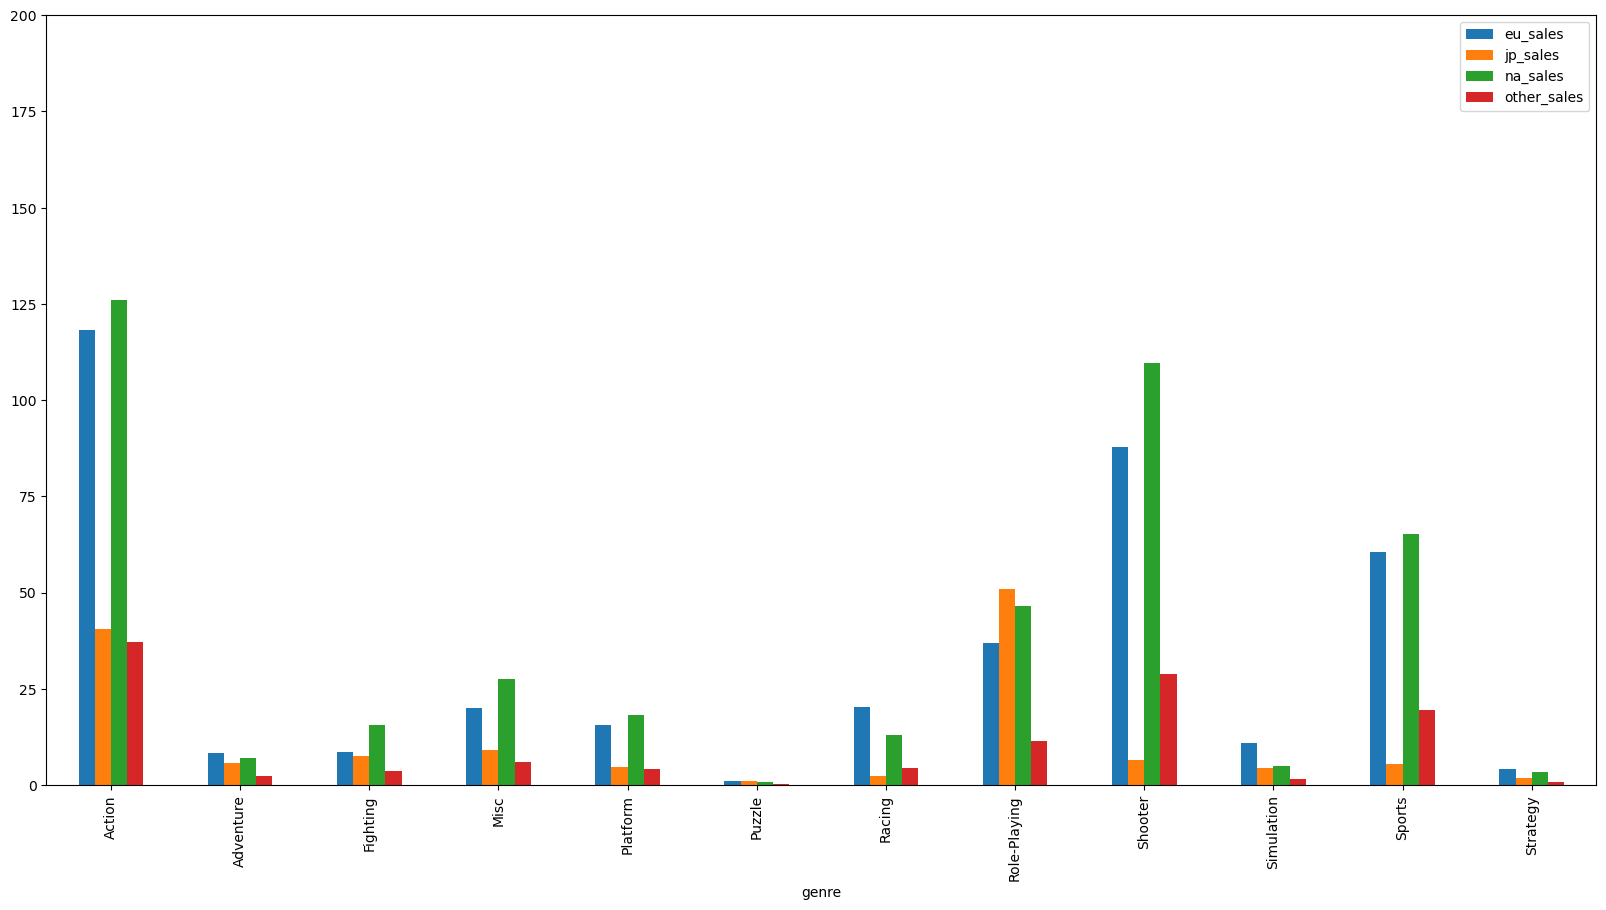

In [789]:
df_actual.pivot_table(values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], index='genre', aggfunc='sum')\
    .plot(kind='bar', figsize=(20, 10), ylim=(0, 200))
# построим столбчатую диаграмму суммарных продаж и суммарного количества игр по жанрам

Топ-5 популярных жанров в регионе Европа: Action, Shooter, Sports, Role-Playing, Pacing и Misc разделяют пятую позицию, однако Pacing немного более продаваемый.  
Топ-5 популярных жанров в регионе Япония: Role-Playing, Action, Misc, Fighting, Shooter.  
Топ-5 популярных жанров в регионе СА: Action, Shooter, Sports, Role-Playing, Misc.  
Топ-5 популярных жанров в регионе остальные страны: Action, Shooter, Sports, Role-Playing, Misc.  

Относительно ТОПов:  
СА и Европа, как и в случае с платформами, похожи.  
Жанр Role-Playing наиболее интересен Японии, чем жанр Action всему остальному миру. Shooter наоборот наименее интересен Японии, чем всему остальному миру. Так же в Японский топ попадает отличительный, нигде больше так не популярный жанр Fighting

In [790]:
print(df_actual['rating'].unique())
print(df_actual.shape)
df_actual['rating'].isna().sum()

['M' nan 'E' 'T' 'E10+']
(2233, 12)


977

Столбец имеет большое количество пропусков "nan", почти 44%.  
Это необходимо учесть при анализе влияния рейтинга ESRB на продажи в отдельном регионе


<AxesSubplot:>

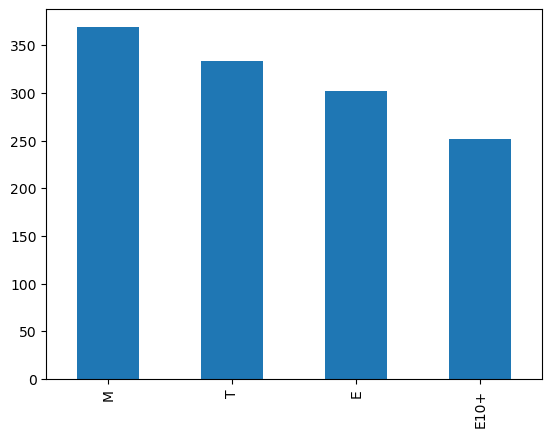

In [791]:
df_actual['rating'].value_counts().plot(kind='bar')# строим столбчатую диаграмму жанров игр

На графике показаны доли игр по рейтингам без учета пропусков.  
Самый популярный рейтинг М - старше 17 лет   
Затем идет рейтинг Т - от 13 лет, далее Е - для всех возрастов и рейтинг Е10+ - от 10 лет и старше.  

Изучим влияние пропусков на каждый регион по отдельности. Посчитаем процент пропусков в столбце *"рейтинг"* и сравним с процентом продаж, который приходится на игры без рейтинга.

In [792]:
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    sales_no_rating = (df_actual[df_actual['rating'].isna()][i].sum() / df_actual[i].sum() * 100).round(1)
    #доля продаж игр без рейтинга
    print(f'Регион: {i} - {sales_no_rating}%')

Регион: na_sales - 20.4%
Регион: eu_sales - 20.1%
Регион: jp_sales - 60.4%
Регион: other_sales - 19.6%


Критерий №1:  
Японцы явно не ориентируются на рейтинг при выборе игры, даже скорее наоборот, стараются найти игры, которые не оцениваются организацией ESRB. Либо не имеют доступа к таким играм, либо на играх просто нет соответсвующих меток с рейтингом, так как изначально организация ESRB создавалась для принятия и определения рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.
По данному критерию:  
В регионе Япония рейтинг не влияет, либо влияет в обратную сторону;  
В других регионах примерно одинаково люди предпочитают оцененные игры, лишь в среднем 20% людей покупаают игры без меток. Соответственно рейтинг имеет решающее значение в данных регионах.

In [793]:
print('Доля продаж игр без рейтинга с продажами больше медианы самого успешного жанра shooter:')
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    sales_no_rating = (df_actual[(df_actual['rating'].isna()) & (df_actual[j] > 0.45)][i].sum() / df_actual[i].sum() * 100).round(1)
    #доля продаж игр без рейтинга
    print(f'Регион: {i} - {sales_no_rating}%')
print('\nДоля продаж игр без рейтинга с продажами больше среднего самого успешного жанра shooter:')
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    sales_no_rating = (df_actual[(df_actual['rating'].isna()) & (df_actual[j] > 1.25)][i].sum() / df_actual[i].sum() * 100).round(1)
    #доля продаж игр без рейтинга
    print(f'Регион: {i} - {sales_no_rating}%')

Доля продаж игр без рейтинга с продажами больше медианы самого успешного жанра shooter:
Регион: na_sales - 8.7%
Регион: eu_sales - 7.9%
Регион: jp_sales - 7.7%
Регион: other_sales - 8.3%

Доля продаж игр без рейтинга с продажами больше среднего самого успешного жанра shooter:
Регион: na_sales - 2.1%
Регион: eu_sales - 2.4%
Регион: jp_sales - 0.4%
Регион: other_sales - 3.1%


Критерий №2:  
По данному критерию до определенного предела количества проданных копий ситуация с влиянием рейтингом - разная.  
Если брать мединное значение самого эффективного жанра "Шутер", то влияние рейтинга во ввсех странах одинаковое, даже в регионах СА и остальные страны шанс игр без рейтинга на успех выше, чем в европе и японии (в японии на удивление рейтинг имеет наибольшее влияние)  

Но если брать порог по среднему жанра "Шутер" = 1.25, то в Японии игры без рейтинга практически вообще не имеют шансов, соответственно рейтинг имеет большое значение.  
В СА и Европе влияние одинаковое.  
В остальных странах рейтинг имеет наибольшее значение из всех регионов.

In [794]:
for j in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    d = (df_actual[(df_actual['rating'].isna()) & (df_actual[j] > 0)][j].count() / df_actual[df_actual[j]> 0][j].count() * 100).round(1)
    #доля игр без рейтинга с продажами больше нуля
    print(f'Регион: {j} - {d}%')

Регион: na_sales - 22.8%
Регион: eu_sales - 23.6%
Регион: jp_sales - 60.0%
Регион: other_sales - 22.5%


По данному критерию  №3:  

В регионе Япония игры без рейтинга имеют больше шансов на успех, однако не понятно, на сколько большой это успех и можно ли это вообще считать успехом (для этого нужен другой критерий сравнения).  
В целом в Японии рейтинг не имеет влияния, либо сказывается отрицательно на продажах, так же не исключается возможность простого отсутствия меток с рейтингом, либо самих игр;  

В других регионах примерно одинаковая доля продаж неоцененных игр, в среднем 22% продаж игр без меток. Соответственно рейтинг имеет решающее значение в данных регионах.

In [795]:
for j in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    d = (df_actual[(df_actual['rating'].isna())][j].count() / df_actual[df_actual[j]> 0][j].count() * 100).round(1)
    #доля игр без рейтинга к играм с продажами больше 0
    print(f'Регион: {j} - {d}%')

Регион: na_sales - 74.6%
Регион: eu_sales - 68.7%
Регион: jp_sales - 82.3%
Регион: other_sales - 78.1%


По данному критерию №4 регионы, грубо говоря, похожи, однако Европа и СА более склонны к играм с рейтингом. Другие страны скорее меньше зависят от рейтинга. Япония все так же влиянию рейтинга не поддается

In [796]:
for j in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    d = (df_actual[(df_actual['rating'].isna()) & (df_actual[j] > 0)][j].count() / df_actual[(df_actual['rating'].isna())][j].count() * 100).round(1)
    #доля игр без рейтинга с продажами больше 0 к количеству игр без рейтинга
    print(f'Регион: {j} - {d}%')

Регион: na_sales - 30.5%
Регион: eu_sales - 34.4%
Регион: jp_sales - 72.9%
Регион: other_sales - 28.9%


Данных критерий №5 позволяет нагляднее оценить влияние рейтинга на продажи.  
В других странах, СА и Европе рейтинг оказывает существенное влияние на продажи, без меток организации ESRB шансы на хоть какие-нибудь продажи в среднем около 30%.  
Чего нельзя сказать про регион Япония, там рейтинг опять бессилен.

In [797]:
print('Доля игр без рейтинга с продажами больше медианы успешного жанра shooter к количеству игр без рейтинга:')
for j in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    d = (df_actual[(df_actual['rating'].isna()) & (df_actual[j] > 0.45)][j].count() / df_actual[(df_actual['rating'].isna())][j].count() * 100).round(1)
    #доля игр без рейтинга с продажами больше 0 к количеству игр без рейтинга
    print(f'Регион: {j} - {d}%')
print('\nДоля игр без рейтинга с продажами больше среднего самого успешного жанра shooter к количеству игр без рейтинга:')
for j in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    d = (df_actual[(df_actual['rating'].isna()) & (df_actual[j] > 1.25)][j].count() / df_actual[(df_actual['rating'].isna())][j].count() * 100).round(1)
    #доля игр без рейтинга с продажами больше 0 к количеству игр без рейтинга
    print(f'Регион: {j} - {d}%')

Доля игр без рейтинга с продажами больше медианы успешного жанра shooter к количеству игр без рейтинга:
Регион: na_sales - 4.0%
Регион: eu_sales - 3.4%
Регион: jp_sales - 2.5%
Регион: other_sales - 1.1%

Доля игр без рейтинга с продажами больше среднего самого успешного жанра shooter к количеству игр без рейтинга:
Регион: na_sales - 1.4%
Регион: eu_sales - 1.5%
Регион: jp_sales - 1.4%
Регион: other_sales - 0.2%


Критерий №6:  
Влияние рейтинга в СА и Европе меньше  
Влияние рейтинга в Японии и остальых странах больше 

Проверим, сколько всего игр без рейтинга с нулевыми продажами по отношению к общему количеству игр без продаж.

In [798]:
for column in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    d = (df_actual[df_actual[column] == 0]['rating'].isna().sum() / df_actual[df_actual[column] == 0][i].count() * 100).round(1)
    print(f'Регион: {column} - {d}%')
#(df_actual[df_actual['rating'].isna()]['na_sales'] == 0).count()
#df_actual['rating'].isna().sum()
#df_actual[df_actual['na_sales'] == 0]

Регион: na_sales - 73.5%
Регион: eu_sales - 79.0%
Регион: jp_sales - 25.3%
Регион: other_sales - 70.8%


Критерий №7:  
В Японии рейтинг не влияет, в других регионах наоборот

| region | №1 | №2 | №2 | №3 | №4 | №5 | №6 | №6 | №7 | total +/- |
|--|--|--|--|--|--|--|--|--|--|--|
| EU | + | - | - | + | + | + | - | - | + | 5/4 |
| NA | + | + | - | + | + | + | - | - | + | 6/3 |
| JP | - | + | + | - | - | - | - | - | - | 2/7 |
| OT | + | - | - | + | - | + | + | + | + | 6/3 |


Исходя из результатов можно сказать, что больше всего рейтинг влияет на Европу, СА и остальные страны.  
В Японии влияние рейтинга минимально. Это и логично, ведь изначально рейтинг от организации ESRB создавался для СА, вероятно он так же косвенно стал использоваться в Европе и чуть более активно в остальных странах. В Японии же люди пользуются какими-то другими рейтингами или чем-то подобным, либо присутствует другая проблема, например, местный запрет на рейтинговую систему ESRB или присутствует своя кардинально другая система. 

### Шаг 5. Проверка гипотез

Поясните:
*	Как вы сформулировали нулевую и альтернативную гипотезы;
*	Какой критерий применили для проверки гипотез и почему.

#### Проверим гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформируем нулевую и альтернативную гипотезы.  
Н_0: **средний пользовательский рейтинг платформы Xbox One = сренему пользовательскому рейтингу платформы PC.**  
Н_1: **средний пользовательский рейтинг платформы Xbox One ≠ сренему пользовательскому рейтингу платформы PC.**  
Примем alpha=0.05

Сначала проверим, в какие годы данные платформы присутствовали на рынке.

<AxesSubplot:xlabel='year_of_release'>

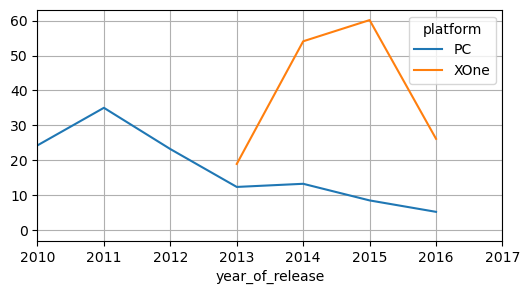

In [799]:
df.query('platform in ["XOne", "PC"]')\
    .pivot_table(values = 'all_sales', columns='platform',index='year_of_release', aggfunc='sum')\
    .plot(figsize=(6,3),  grid=True, xlim=(2010, 2017))

Платформа "XOne" вышла на рынок лишь в 2013, в то время как "PC" существовала весь промежуток который охватывает датафрейм

In [800]:
from scipy import stats as st
alpha = 0.05
sample_1 = df_actual.query('platform == "XOne" and year_of_release >= 2013 and user_score.notna()')['user_score'].astype('float64') # sample_1 - выборка из первой генеральной совокупности
sample_2 = df_actual.query('platform == "PC" and year_of_release >= 2013 and user_score.notna()')['user_score'].astype('float64') # sample_2 - выборка из второй генеральной совокупности

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')  

p-значение:  0.14759594013430463
Не отвергаем нулевую гипотезу


За основу была взята **"Гипотеза о равенстве средних двух генеральных совокупностей"**  
Метод scipy.stats.ttest_ind() был выбран по причине независимости оценок пользователей на этих платформах (независимые выборки). Выше было наглядно показано, что в разных регионах предпочитают разные платформы, а значит и пользователи разные.

Вывод: средний пользовательский рейтинг платформы XOne не может быть ≠ сренему пользовательскому рейтингу платформы РС

#### Проверим гипотезу: cредние пользовательские рейтинги жанров Action и Sports разные

Сформируем нулевую и альтернативную гипотезы.  
Н_0: **средний пользовательский рейтинг жанра Action = сренему пользовательскому рейтингу жанра Sports.**  
Н_1: **средний пользовательский рейтинг жанра Action ≠ сренему пользовательскому рейтингу жанра Sports.**  
Примем alpha=0.05

In [801]:
alpha = 0.05
sample_1 = df.query('genre == "Action" and user_score.notna()')['user_score'].astype('float64') # sample_1 - выборка из первой генеральной совокупности
sample_2 = df.query('genre == "Sports" and user_score.notna()')['user_score'].astype('float64') # sample_2 - выборка из второй генеральной совокупности

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Если брать генеральную совокупность за всю историю "Стримчика", то отвергаем нулевую гипотезу')
else:
    print('Если брать генеральную совокупность за всю историю "Стримчика", то не отвергаем нулевую гипотезу')  

p-значение:  0.07370217419278526
Если брать генеральную совокупность за всю историю "Стримчика", то не отвергаем нулевую гипотезу


In [802]:
alpha = 0.05
sample_1 = df_actual.query('genre == "Action" and user_score.notna()')['user_score'].astype('float64') # sample_1 - выборка из первой генеральной совокупности
sample_2 = df_actual.query('genre == "Sports" and user_score.notna()')['user_score'].astype('float64') # sample_2 - выборка из второй генеральной совокупности

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')  

p-значение:  1.4460039700704315e-20
Отвергаем нулевую гипотезу


За основу была взята **"Гипотеза о равенстве средних двух генеральных совокупностей"**  
Метод scipy.stats.ttest_ind() был выбран по причине независимости оценок пользователей различных жанров (независимые выборки). Жанры никак не связаны между собой.

Вывод: средний пользовательский рейтинг жанра Action может быть ≠ сренему пользовательскому рейтингу жанра Sports

*При составлении выборок из более актуальной генеральной совокупности нулевая гипотеза отвергается

### Шаг 6. Общий вывод

В рамках проекта была проведена следующая работа:  
1. **Выполнен общий обзор данных**:  
Аббревиатура "tbd" в столбце *user_score* была заменена на пропуски "nan". С 1993 года до 2010 года наблюдается рост числа релизов игр. Далее идет резкий спад с дальнейшей стагнацией после 2011 года. Большинство критиков оценивает игры от 60 до 85 баллов. Пользователи оценивают игры в основном от 6.5 до 8.7 баллов.  Самые популярные приставки: PS2, DS и PS3. Больше всего игр в жанре action и sports. Самый популярный рейтинг Е - для всех возрастов.
2. **Выполнена подготовка данных**:
Было удалено немногочисленное кол-во строк с пропусками в столбцах *'name'*, *'genre'* и *'year_of_relase'*. Добавлен столбец *'all_sales'* с суммарными продажами во всех регионах.
3. **Исследовательский анализ данных**:
Была выявлена средняя продолжительность жизни игровой платформы, равная 10 годам. Был выбран актуальный период с 2013 года, включительно, в этом году вышли популярные платформы PS4, XOnе. Так же после 2013 снизился общий уровень продаж. Также популярными платформами были выбраны РС и 3DS. В среднем наилучшие показатели продаж имеют платформы: PS3, PS4,, Wii, WiiU, 3DS, X360 и XOne. Выяснили, что хорошая оценка критиков (от 70 и выше) повышает шансы игры на большие продажи, при этом в общем оценка критиков на продажи не влияет. Оценка пользователей вообще не имеют влияния на продажи. Жанр Action является фаворитом среди всех жанров, он имеет как самое большое кол-во игр, так и самые крупные продажи. Самым малочисленным и наименее продаваемым является жанр Puzzle. Самыми стабильно прибыльными жанрами после жанра Shooter являются Sports и Platform.
4. **Портрет пользователя каждого региона**:  
*Популярность платформ по регионам:*  
В Европе платформы PS4, PS3, XOne, X360 и 3DS входят в топ-5 самых популярных;  
В Японии: 3DS, PS3, PSV, PS4, WiiU;  
В Северной Америке: PS4, XOne, X360, PS3, 3DS;
В остальных странах: PS4, PS3, XOne, X360 и 3DS, аналогично ситуации в Европе.  
Самые платежеспособные регионы это СА и Европа. Япония занимает примерно такую же долю, как и се остальные страны кроме СА и Европы.  
*Популярность жанров по регионам:*  
Топ-5 популярных жанров в регионе Европа: Action, Shooter, Sports, Role-Playing, Pacing и Misc разделяют пятую позицию, однако Pacing немного более продаваемый.   
Топ-5 популярных жанров в регионе Япония: Role-Playing, Action, Misc, Fighting, Shooter.  
Топ-5 популярных жанров в регионе СА: Action, Shooter, Sports, Role-Playing, Misc.  
Топ-5 популярных жанров в регионе остальные страны: Action, Shooter, Sports, Role-Playing, Misc.  
Больше всего рейтинг от ESRB влияет на Европу, Северную Америку и остальные страны. В Японии влияние рейтинга минимально. Чем больше людей попадает в категорию, тем больше продаж. За актуальный период самый популярный рейтинг М - старше 17 лет.
5. **Проверка гипотез**:  
В результате проверки гипотез выяснилось, что:  
средние пользовательские рейтинги платформ XOne и РС могут быть одинаковыми;  
средний пользовательский рейтинг жанра Action и Sports не одинаковые.  

